 aqui inicia el trabajo en la usmnh

In [32]:
import pandas as pd
import numpy as np
#importa las fuciones que cree desde otro notebook (instalar modulo ipynb)
import ipynb.fs.defs.my_funcs_clusters as myfunc
import matplotlib.pyplot as plt
from matplotlib.ticker import EngFormatter
from matplotlib import rc, font_manager


# Procesamiento de datos

In [2]:
lsPath = 'C:/Users/mungu/Documents/DatosWTG.xlsx'
xlsPathMfgCurve = 'Curva de potencia vestas 90.xlsx'
dataVDP,dfVecVel,dfMfgCurve = myfunc.raw_to_datafr(lsPath,xlsPathMfgCurve)
dataVP = dataVDP.drop('Dir',axis=1)

Total de registros: 52848
Numero de filas sin datos
vViento    312
Pacw       312
dtype: int64


# Encontrar clusters y centroides

In [3]:
#encontrar clusters y centroides
#solo clusters sin subclusters
ncl = 25   # numero de clusters
nsubcl =0  #numero de subclusters
#subclusters
clsclord=('viento','potencia') #orden de clusterizado
# crear los dataframes agrupados en clusters
dfclvv, dfclpw, dfclvp, cl_ord,cl_cent,idx_centroids,scl_ord,scl_cent,idx_centroids_sc = myfunc.cluster2DataFrame(
    dfVecVel, dataVDP, n_clusters=ncl,n_subclu =nsubcl,clusters=clsclord[0],subclusters=clsclord[1])


In [4]:
dfclvp

C1                    C2          C3          C4      \
                    vViento            Pw vViento  Pw vViento  Pw vViento  Pw   
2016-01-01 00:00:00     NaN           NaN     NaN NaN     NaN NaN     NaN NaN   
2016-01-01 00:10:00     NaN           NaN     NaN NaN     NaN NaN     NaN NaN   
2016-01-01 00:20:00     NaN           NaN     NaN NaN     NaN NaN     NaN NaN   
2016-01-01 00:30:00     NaN           NaN     NaN NaN     NaN NaN     NaN NaN   
2016-01-01 00:40:00     NaN           NaN     NaN NaN     NaN NaN     NaN NaN   
...                     ...           ...     ...  ..     ...  ..     ...  ..   
2017-01-01 23:00:00     0.8      0.000000     NaN NaN     NaN NaN     NaN NaN   
2017-01-01 23:10:00     1.0 -12723.450247     NaN NaN     NaN NaN     NaN NaN   
2017-01-01 23:20:00     1.2 -12723.450247     NaN NaN     NaN NaN     NaN NaN   
2017-01-01 23:30:00     1.1      0.000000     NaN NaN     NaN NaN     NaN NaN   
2017-01-01 23:40:00     0.6 -12723.450247     NaN NaN     NaN NaN     NaN NaN   

                         C5      ...     C21                   C22      \
                    vViento  Pw  ... vViento            Pw vViento  Pw   
2016-01-01 00:00:00     NaN NaN  ...     NaN           NaN     NaN NaN   
2016-01-01 00:10:00     NaN NaN  ...    14.8  2.067561e+06     NaN NaN   
2016-01-01 00:20:00     NaN NaN  ...    16.2  2.048475e+06     NaN NaN   
2016-01-01 00:30:00     NaN NaN  ...    14.9  2.080284e+06     NaN NaN   
2016-01-01 00:40:00     NaN NaN  ...    16.2  2.073922e+06     NaN NaN   
...                     ...  ..  ...     ...           ...     ...  ..   
2017-01-01 23:00:00     NaN NaN  ...     NaN           NaN     NaN NaN   
2017-01-01 23:10:00     NaN NaN  ...     NaN           NaN     NaN NaN   
2017-01-01 23:20:00     NaN NaN  ...     NaN           NaN     NaN NaN   
2017-01-01 23:30:00     NaN NaN  ...     NaN           NaN     NaN NaN   
2017-01-01 23:40:00     NaN NaN  ...     NaN           NaN     NaN NaN   

                        C23         C24         C25      
                    vViento  Pw vViento  Pw vViento  Pw  
2016-01-01 00:00:00     NaN NaN     NaN NaN     NaN NaN  
2016-01-01 00:10:00     NaN NaN     NaN NaN     NaN NaN  
2016-01-01 00:20:00     NaN NaN     NaN NaN     NaN NaN  
2016-01-01 00:30:00     NaN NaN     NaN NaN     NaN NaN  
2016-01-01 00:40:00     NaN NaN     NaN NaN     NaN NaN  
...                     ...  ..     ...  ..     ...  ..  
2017-01-01 23:00:00     NaN NaN     NaN NaN     NaN NaN  
2017-01-01 23:10:00     NaN NaN     NaN NaN     NaN NaN  
2017-01-01 23:20:00     NaN NaN     NaN NaN     NaN NaN  
2017-01-01 23:30:00     NaN NaN     NaN NaN     NaN NaN  
2017-01-01 23:40:00     NaN NaN     NaN NaN     NaN NaN  

[52530 rows x 50 columns]

In [5]:
#este es el promedio de las velocidades de viento de cada cluster
#no es igual a la magnitud de vx y vy porque vx y vy son puntos de datos
#que existen, y si calculamos vx y vy solo a partir de la direccion y de la
#velocidad del viento, el centroide queda en un punto en el espacio en donde
#no se tienen datos, y no quise que pasara eso, [que tiene de diferente del kmeans ++?]
for i in range(ncl):
    print( 'C' + str(i+1) +': '+ str(dfclvp['C'+str(i+1)].vViento.mean()))

C1: 0.9914857142857169
C2: 2.176339113680157
C3: 2.2466269841269875
C4: 2.4761952191235066
C5: 2.4841947769314525
C6: 3.1145508337816117
C7: 3.450517464424316
C8: 3.648505114083399
C9: 4.131162790697676
C10: 5.3413367390378745
C11: 5.542808607021511
C12: 5.802891068662883
C13: 6.066243194192375
C14: 6.2645035691109685
C15: 8.548605577689237
C16: 10.402591549295774
C17: 11.21161061946904
C18: 12.953920118343174
C19: 14.046494798733589
C20: 15.037218045112812
C21: 15.576685764653996
C22: 17.61699178644766
C23: 18.734883720930238
C24: 20.67757377049181
C25: 23.487936507936503


# # Buscar estados alrededor de pot nominal por promedio de vv  directo del df de clusters


In [6]:
#calcular la velocidad promedio de cada clusters a partir de todas las velocidades de viento
#comprobar con otros metodos para calcular centroides como magnitud y cl_ord
velpromcls=[]
for i in range(ncl):
    velpromcls.append(dfclvp['C'+str(i+1)].vViento.mean())
    print( 'C' + str(i+1) +': '+ str(velpromcls[i]) )

C1: 0.9914857142857169
C2: 2.176339113680157
C3: 2.2466269841269875
C4: 2.4761952191235066
C5: 2.4841947769314525
C6: 3.1145508337816117
C7: 3.450517464424316
C8: 3.648505114083399
C9: 4.131162790697676
C10: 5.3413367390378745
C11: 5.542808607021511
C12: 5.802891068662883
C13: 6.066243194192375
C14: 6.2645035691109685
C15: 8.548605577689237
C16: 10.402591549295774
C17: 11.21161061946904
C18: 12.953920118343174
C19: 14.046494798733589
C20: 15.037218045112812
C21: 15.576685764653996
C22: 17.61699178644766
C23: 18.734883720930238
C24: 20.67757377049181
C25: 23.487936507936503


In [7]:
#buscar estados alrededor de la potencia nominal (velocidades menores a 9 y mayores a 12)
stmayores = [i for i in velpromcls if i > 12]
stmenores = [i for i in velpromcls if i < 9]
stalred = stmenores + stmayores
stalred

[0.9914857142857169,
 2.176339113680157,
 2.2466269841269875,
 2.4761952191235066,
 2.4841947769314525,
 3.1145508337816117,
 3.450517464424316,
 3.648505114083399,
 4.131162790697676,
 5.3413367390378745,
 5.542808607021511,
 5.802891068662883,
 6.066243194192375,
 6.2645035691109685,
 8.548605577689237,
 12.953920118343174,
 14.046494798733589,
 15.037218045112812,
 15.576685764653996,
 17.61699178644766,
 18.734883720930238,
 20.67757377049181,
 23.487936507936503]

In [8]:
#calcular la velocidad promedio de cada clusters a partir de todas las velocidades de viento
#comprobar con otros metodos para calcular centroides como magnitud y cl_ord
velpromcls=[]
for i in range(ncl):
    velpromcls.append( (i,dfclvp['C'+str(i+1)].vViento.mean()) )
    print( 'C' + str(i+1) +': '+ str(velpromcls[i]) )

C1: (0, 0.9914857142857169)
C2: (1, 2.176339113680157)
C3: (2, 2.2466269841269875)
C4: (3, 2.4761952191235066)
C5: (4, 2.4841947769314525)
C6: (5, 3.1145508337816117)
C7: (6, 3.450517464424316)
C8: (7, 3.648505114083399)
C9: (8, 4.131162790697676)
C10: (9, 5.3413367390378745)
C11: (10, 5.542808607021511)
C12: (11, 5.802891068662883)
C13: (12, 6.066243194192375)
C14: (13, 6.2645035691109685)
C15: (14, 8.548605577689237)
C16: (15, 10.402591549295774)
C17: (16, 11.21161061946904)
C18: (17, 12.953920118343174)
C19: (18, 14.046494798733589)
C20: (19, 15.037218045112812)
C21: (20, 15.576685764653996)
C22: (21, 17.61699178644766)
C23: (22, 18.734883720930238)
C24: (23, 20.67757377049181)
C25: (24, 23.487936507936503)


In [9]:
#buscar estados alrededor de la potencia nominal (velocidades menores a 9 y mayores a 12)
# stmayores = [i for i in velpromcls if i > 12]
# stmenores = [i for i in velpromcls if i < 9]
# stalred = stmenores + stmayores
# stalred

C:\Users\mungu\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


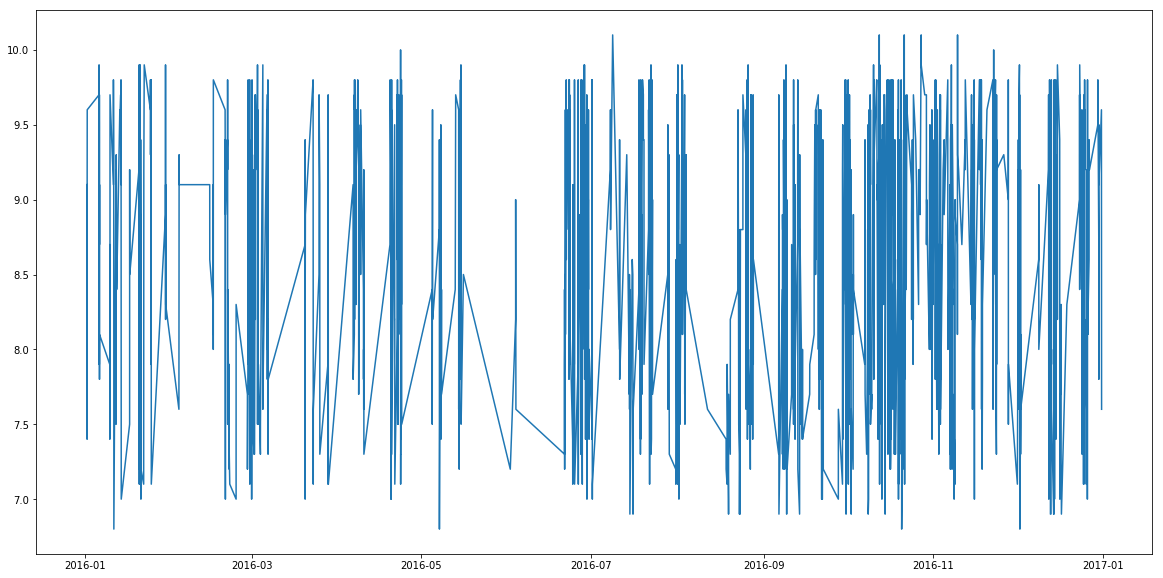

In [10]:
c3 = dfclvp.C15.dropna()
# Plot
plt.figure(figsize=(20,10))
plt.plot(c3.index,c3.vViento)

# Buscar estados alrededor de pot nominal por magnitud prom (incompleto)

In [11]:
#estos son los centroides calculados a mano a partir de la magnitud de vx y vy
#como los centroides no caen dentro de un punto de datos que existe, no son iguales
#a scl centroids
magnivxvyReal =[]
for i in range(ncl):
    #magnitud calculada a partir de vx, vy, puntos de datos no coinciden como en cl_cent
    magnivxvyReal.append( np.sqrt( (cl_cent[i][0]**2 + cl_cent[i][1]**2)) )

for i in range(len(magnivxvyReal)):
    print('C' + str(i+1) + ': ' + str(magnivxvyReal[i]) )

C1: 5.715056570355798
C2: 5.362456113493322
C3: 17.591323205328543
C4: 8.495599037002416
C5: 2.061613323655903
C6: 5.279988171898652
C7: 12.933127055919345
C8: 0.6559265151073188
C9: 3.3714090972110875
C10: 11.174483757967295
C11: 23.44868099566147
C12: 6.175799848595883
C13: 3.02015368395982
C14: 18.69903214085426
C15: 2.115560636391003
C16: 14.018918174513457
C17: 3.5617611476954014
C18: 4.0162440582948
C19: 2.4023802973811654
C20: 20.651437360999623
C21: 15.55769052950244
C22: 5.985810610672704
C23: 10.340377628904644
C24: 2.349290644416089
C25: 14.98538245398881


In [12]:
#no me salio el orden, pensar mejor que hace y que quiero hacer
[x for _, x in sorted(zip(idx_centroids.cluster_ID, magnivxvyReal))]


[6.175799848595883,
 11.174483757967295,
 5.985810610672704,
 2.115560636391003,
 5.362456113493322,
 23.44868099566147,
 4.0162440582948,
 5.715056570355798,
 12.933127055919345,
 3.5617611476954014,
 14.98538245398881,
 18.69903214085426,
 5.279988171898652,
 10.340377628904644,
 17.591323205328543,
 2.4023802973811654,
 0.6559265151073188,
 3.3714090972110875,
 2.061613323655903,
 2.349290644416089,
 15.55769052950244,
 3.02015368395982,
 14.018918174513457,
 8.495599037002416,
 20.651437360999623]

In [13]:
list(idx_centroids.cluster_ID)

[7,
 4,
 14,
 23,
 18,
 12,
 8,
 16,
 17,
 1,
 5,
 0,
 21,
 11,
 3,
 22,
 9,
 6,
 15,
 24,
 20,
 2,
 13,
 19,
 10]

In [14]:
dfclvp

C1                    C2          C3          C4      \
                    vViento            Pw vViento  Pw vViento  Pw vViento  Pw   
2016-01-01 00:00:00     NaN           NaN     NaN NaN     NaN NaN     NaN NaN   
2016-01-01 00:10:00     NaN           NaN     NaN NaN     NaN NaN     NaN NaN   
2016-01-01 00:20:00     NaN           NaN     NaN NaN     NaN NaN     NaN NaN   
2016-01-01 00:30:00     NaN           NaN     NaN NaN     NaN NaN     NaN NaN   
2016-01-01 00:40:00     NaN           NaN     NaN NaN     NaN NaN     NaN NaN   
...                     ...           ...     ...  ..     ...  ..     ...  ..   
2017-01-01 23:00:00     0.8      0.000000     NaN NaN     NaN NaN     NaN NaN   
2017-01-01 23:10:00     1.0 -12723.450247     NaN NaN     NaN NaN     NaN NaN   
2017-01-01 23:20:00     1.2 -12723.450247     NaN NaN     NaN NaN     NaN NaN   
2017-01-01 23:30:00     1.1      0.000000     NaN NaN     NaN NaN     NaN NaN   
2017-01-01 23:40:00     0.6 -12723.450247     NaN NaN     NaN NaN     NaN NaN   

                         C5      ...     C21                   C22      \
                    vViento  Pw  ... vViento            Pw vViento  Pw   
2016-01-01 00:00:00     NaN NaN  ...     NaN           NaN     NaN NaN   
2016-01-01 00:10:00     NaN NaN  ...    14.8  2.067561e+06     NaN NaN   
2016-01-01 00:20:00     NaN NaN  ...    16.2  2.048475e+06     NaN NaN   
2016-01-01 00:30:00     NaN NaN  ...    14.9  2.080284e+06     NaN NaN   
2016-01-01 00:40:00     NaN NaN  ...    16.2  2.073922e+06     NaN NaN   
...                     ...  ..  ...     ...           ...     ...  ..   
2017-01-01 23:00:00     NaN NaN  ...     NaN           NaN     NaN NaN   
2017-01-01 23:10:00     NaN NaN  ...     NaN           NaN     NaN NaN   
2017-01-01 23:20:00     NaN NaN  ...     NaN           NaN     NaN NaN   
2017-01-01 23:30:00     NaN NaN  ...     NaN           NaN     NaN NaN   
2017-01-01 23:40:00     NaN NaN  ...     NaN           NaN     NaN NaN   

                        C23         C24         C25      
                    vViento  Pw vViento  Pw vViento  Pw  
2016-01-01 00:00:00     NaN NaN     NaN NaN     NaN NaN  
2016-01-01 00:10:00     NaN NaN     NaN NaN     NaN NaN  
2016-01-01 00:20:00     NaN NaN     NaN NaN     NaN NaN  
2016-01-01 00:30:00     NaN NaN     NaN NaN     NaN NaN  
2016-01-01 00:40:00     NaN NaN     NaN NaN     NaN NaN  
...                     ...  ..     ...  ..     ...  ..  
2017-01-01 23:00:00     NaN NaN     NaN NaN     NaN NaN  
2017-01-01 23:10:00     NaN NaN     NaN NaN     NaN NaN  
2017-01-01 23:20:00     NaN NaN     NaN NaN     NaN NaN  
2017-01-01 23:30:00     NaN NaN     NaN NaN     NaN NaN  
2017-01-01 23:40:00     NaN NaN     NaN NaN     NaN NaN  

[52530 rows x 50 columns]

#  Graficas de clusters

In [11]:

ncl = 5   # numero de clusters
nsubcl =3  #numero de subclusters
#subclusters
clsclord=('viento','potencia') #orden de clusterizado
# crear los dataframes agrupados en clusters
dfclvv, dfclpw, dfclvp, cl_ord,cl_cent,idx_centroids,scl_ord,scl_cent,idx_centroids_sc = myfunc.cluster2DataFrame(
    dfVecVel, dataVP, n_clusters=ncl,n_subclu =nsubcl,clusters=clsclord[0],subclusters=clsclord[1])



In [12]:
idx_centroids.empty

False

Saved in fig_art/VVVPCl5SCl3_22-11-2021_19_07_35_368272.png


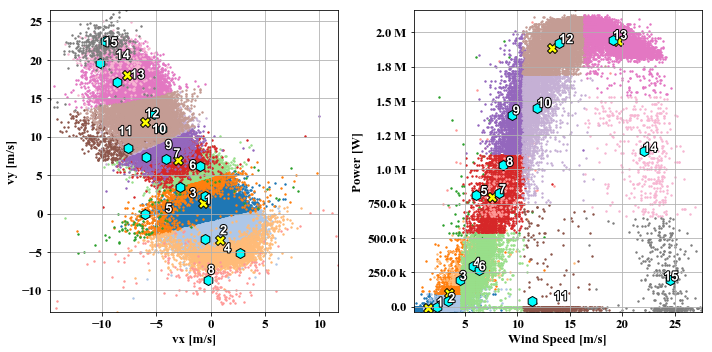

In [13]:
ploti = myfunc.plotSubClusterInt()
ploti.createPlot(dfclvv, dfclvp, dataVP, figsize=(
    10, 5), cl_scl_order=clsclord, idx_centroids=idx_centroids,idx_centroids_sc=idx_centroids_sc,fign=201,
                savepath='fig_art/', showlBetz=False,  showCent= True, showOpt= 'Numero', showMfgCurve=False,
                dfMfgCurve=dfMfgCurve)

# Filtrado

In [17]:
#calculo de la potencia maxima  a partir del limite de betz
A=np.pi*45**2
Cp = 0.59 #limite de Betz
rho = 1.1349
vvento = np.unique(dataVP.vViento.values)
PMaxViento = 1/2*rho*A*vvento**3*Cp

In [18]:
#eliminando valores que superen el limite de betz
dataVP_filt = dataVP.copy()#copia de dataVP hecha para eliminar valores que superen el limited betz
dfVecVel_filt = dfVecVel.copy()
for i in range(len(vvento)):
    idxd =dataVP[(dataVP.vViento==vvento[i])&(dataVP.Pw>PMaxViento[i])].index
    dataVP_filt.drop(idxd,inplace=True)
    dfVecVel_filt.drop(idxd,inplace=True)

In [19]:
# #eliminando valores de potencia negativos menores a 30kW
mask = dataVP[dataVP.Pw<-30E3].index
dataVP_filt.drop(mask,inplace=True)
dfVecVel_filt.drop(mask,inplace=True)


## Clusters con datos filtrados

In [20]:
#subclusters
clsclord=('viento','potencia') #orden de clusterizado
# crear los dataframes agrupados en clusters
dfclvv, dfclpw, dfclvp, cl_ord,cl_cent,idx_centroids,scl_ord,scl_cent,idx_centroids_sc = myfunc.cluster2DataFrame(
    dfVecVel_filt, dataVP_filt, n_clusters=5,n_subclu = 3 ,clusters=clsclord[0],subclusters=clsclord[1])


Saved in VVVPCl5SCl3_22-11-2021_19_11_45_078865.png


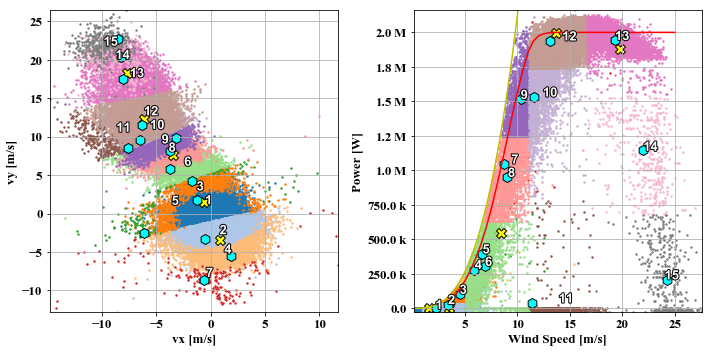

In [21]:
ploti_filt = myfunc.plotSubClusterInt()
ploti_filt.createPlot(dfclvv, dfclvp, dataVP, figsize=(
    10, 5), cl_scl_order=clsclord, idx_centroids=idx_centroids,idx_centroids_sc=idx_centroids_sc,fign=92,dfMfgCurve=dfMfgCurve)

In [22]:
cl_borrar = [('C1', 'SC3'), ('C2', 'SC3'), ('C4', 'SC1'),('C4', 'SC2'),('C5', 'SC2'),('C5', 'SC3')] #5cl y 3 scl
#[3,6,10,11,14,15]
#cl_borrar=[('C1','SC1'),('C1','SC2'),('C1','SC3'),('C2','SC1'),('C2','SC2'),('C2','SC3')]
dfs, idx_centroids_clean,idx_centroids_sc_clean = myfunc.delClusters(
    [dfclvv, dfclvp], cl_borrar, idx_centroids,idx_centroids_sc, cl_type='cluster')
dvv = dfs[0]
dvp = dfs[1]


Saved in fig_art/VVVPCl5SCl3_22-11-2021_19_16_00_376262.png


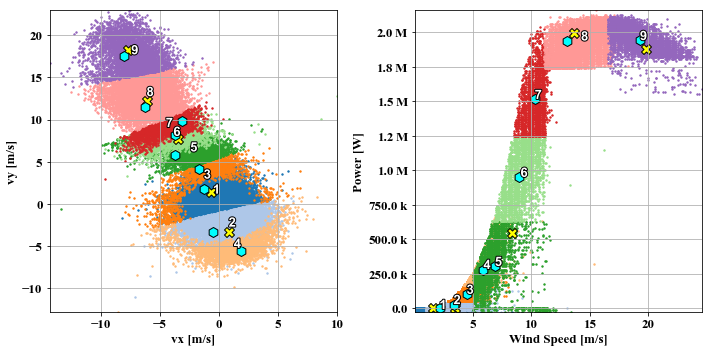

In [25]:
ploti_filt_2 = myfunc.plotSubClusterInt()
ploti_filt_2.createPlot(dvv, dvp, dataVP, figsize=(
    10, 5), cl_scl_order=clsclord, idx_centroids=idx_centroids_clean,idx_centroids_sc=idx_centroids_sc_clean,fign=85,
                        savepath='fig_art/', showlBetz=False, showMfgCurve=False, showCent= True, showOpt= 'Numero',
                       dfMfgCurve=dfMfgCurve)


# grupos naturales


In [28]:
a = dataVP.loc['2016-10-17 00:00':'2016-10-17 19:00']
b = dfVecVel.loc['2016-10-17 00:00':'2016-10-17 19:00']

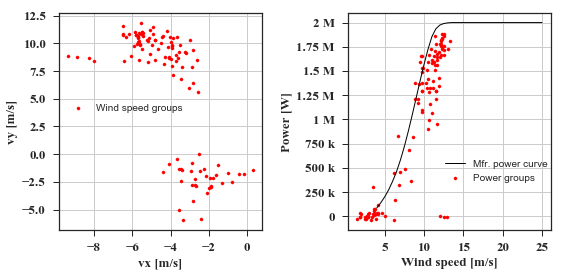

In [50]:
import seaborn as sns
sns.set(style="ticks")
fsize = 13
fontNameLabel = 'Times New Roman'
ticks_font = font_manager.FontProperties(family='Times New Roman', style='normal',
        size=fsize, weight='normal', stretch='normal')   

fig, axs = plt.subplots(1,2)
fig.set_figheight(4)
fig.set_figwidth(8)


axs[1].scatter(a.vViento, a.Pw,s=10,c='r',label='Power groups')
axs[0].scatter(b.vx, b.vy,s=10,c='r',label='Wind speed groups')
axs[1].plot(dfMfgCurve.index,dfMfgCurve.pw,c='k',linewidth=1, label = 'Mfr. power curve')
axs[0].grid()
axs[0].set_xlabel('vx [m/s]',fontsize=fsize,fontname =fontNameLabel)
axs[0].set_ylabel('vy [m/s]',fontsize=fsize,fontname =fontNameLabel)
axs[1].set_xlabel('Wind speed [m/s]',fontsize=fsize,fontname =fontNameLabel)
axs[1].set_ylabel('Power [W]',fontsize=fsize,fontname =fontNameLabel)
axs[1].grid()

plt.gca().yaxis.set_major_formatter(EngFormatter())
axs[1].legend(bbox_to_anchor=(1, 0.2), loc=4, borderaxespad=0.)
axs[0].legend(bbox_to_anchor=(0, .5), loc=3)

for label in axs[0].get_xticklabels():
    label.set_fontproperties(ticks_font)
for label in axs[0].get_yticklabels():
    label.set_fontproperties(ticks_font)
for label in axs[1].get_xticklabels():
    label.set_fontproperties(ticks_font)
for label in axs[1].get_yticklabels():
    label.set_fontproperties(ticks_font)

plt.tight_layout()

plt.savefig('fig_art\example_states_1235.png')

In [58]:
potcalcteor = 6137.714
potrealprodu =5945.16
potcalcteor * 100 /potrealprodu

103.23883629708872

In [59]:
potcalcteor-potrealprodu

192.5540000000001

In [62]:
95.65*100 /potrealprodu

1.6088717545028226